## Business objectives:

After meeting with the various stakeholders we have decided to accomplish the following business tasks:

1. To find segments within our customer base where there are statistically significant differences. The business stakeholders would like to see if demographic (Region, Age, MaritalStatus) and financial metrics (CreditCardDebt, LoanDefault etc.) differ between the segments that are created. 

2. Alongside segmenting the customer base the business stakeholders would like to market products and services to customers with some sense of financial security. After discussion, the agreed metric to determine whether or not a customer has financial security is whether or not they have defaulted on a loan in the past. Luckily, within this customer dataset we have information on whether or not they have defaulted on a loan before (LoanDefault); but the stakeholders are most interested in proactively knowing which of their customers are going to default on their loan(s).

The stakeholders have provided me with a random sample of 5000 customers with various features describing them. Some of the features are irrelevant to the business objectives, so they have asked me to select the appropiate features. 


## Analytic plan:

- Explore the data and become familiar with it.
- Describe the dataset.
- Clean the dataset.
- Preprocess the features for clustering algorithm.
- Use a clustering algorithm to find segments within the customers.
- Predict whether or not a customer will default on their loan.
- Summarize findings.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

## Initial exploration

In [2]:
data = pd.read_csv("consumer_data.csv")
data.head()

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5,5,Male,22,17,Sales,No,0,No,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3,4,Female,67,14,Sales,No,16,No,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,4,3,Male,23,16,Sales,No,0,No,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,2,2,Male,26,16,Sales,No,1,No,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


In [3]:
data.tail()

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
4995,3675-GZFGOT-QJN,2,2,Male,68,10,Professional,No,24,No,...,No,No,No,No,19,No,No,No,No,Yes
4996,4699-LEPCCE-3UD,3,3,Male,51,14,Professional,No,6,No,...,Yes,Yes,Yes,No,14,No,No,No,No,No
4997,8485-LLUICH-CVV,4,5,Male,75,17,Professional,No,24,No,...,Yes,Yes,Yes,No,16,No,No,No,No,Yes
4998,9325-URAAUT-7FA,1,1,Male,47,19,Sales,No,3,No,...,No,No,No,Yes,24,Yes,Yes,Yes,No,Yes
4999,8027-EXDZBF-OGR,3,5,Female,41,10,Crafts,No,20,No,...,No,No,No,No,19,No,No,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 59 columns):
CustomerID             5000 non-null object
Region                 5000 non-null int64
TownSize               5000 non-null object
Gender                 4967 non-null object
Age                    5000 non-null int64
EducationYears         5000 non-null int64
JobCategory            4985 non-null object
UnionMember            5000 non-null object
EmploymentLength       5000 non-null int64
Retired                5000 non-null object
HHIncome               5000 non-null object
DebtToIncomeRatio      5000 non-null float64
CreditDebt             5000 non-null float64
OtherDebt              5000 non-null float64
LoanDefault            5000 non-null object
MaritalStatus          5000 non-null object
HouseholdSize          4992 non-null float64
NumberPets             4994 non-null float64
NumberCats             4993 non-null float64
NumberDogs             4992 non-null float64
NumberBird

The dataset has 5,000 observations and 59 features. Lets see if there are any missing values.

In [5]:
null = data.isnull().sum()/len(data)
null[null > 0].sum()

0.0248

The dataset has only a small percentage of missing values. Because the missing values are a small proportion of the dataset I am probably going to drop the rows that contain some of those missing values. But before we do that, we must further explore the dataset.

Now let me see how many unique values there are for each feature.

In [6]:
# finding unique counts
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(data)

CustomerID :  5000
Region :  5
TownSize :  6
Gender :  2
Age :  62
EducationYears :  18
JobCategory :  6
UnionMember :  2
EmploymentLength :  52
Retired :  2
HHIncome :  266
DebtToIncomeRatio :  325
CreditDebt :  4902
OtherDebt :  4947
LoanDefault :  2
MaritalStatus :  2
HouseholdSize :  9
NumberPets :  20
NumberCats :  7
NumberDogs :  7
NumberBirds :  6
HomeOwner :  2
CarsOwned :  9
CarOwnership :  3
CarBrand :  3
CarValue :  801
CommuteTime :  42
PoliticalPartyMem :  2
Votes :  2
CreditCard :  5
CardTenure :  41
CardItemsMonthly :  24
CardSpendMonth :  4760
ActiveLifestyle :  2
PhoneCoTenure :  73
VoiceLastMonth :  866
VoiceOverTenure :  4438
EquipmentRental :  2
EquipmentLastMonth :  735
EquipmentOverTenure :  1683
CallingCard :  2
WirelessData :  2
DataLastMonth :  746
DataOverTenure :  1328
Multiline :  2
VM :  2
Pager :  2
Internet :  5
CallerID :  2
CallWait :  2
CallForward :  2
ThreeWayCalling :  2
EBilling :  2
TVWatchingHours :  32
OwnsPC :  2
OwnsMobileDevice :  2
OwnsGameS

While there are many features in this dataset, we will limit the number of features used in this analysis. To get a better sense of the demographic data, lets explore the distribution of gender, age, and employment.

In [7]:
# relative frequencies of gender
data["Gender"].value_counts(normalize=True)

Female    0.502114
Male      0.497886
Name: Gender, dtype: float64

In [8]:
# summary stats of age
data["Age"].describe()

count    5000.000000
mean       47.025600
std        17.770338
min        18.000000
25%        31.000000
50%        47.000000
75%        62.000000
max        79.000000
Name: Age, dtype: float64

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


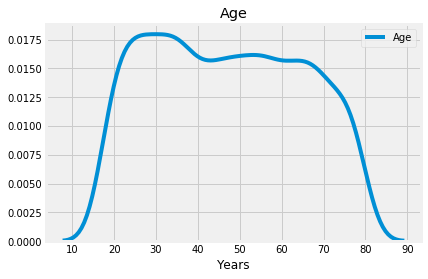

In [9]:
sns.kdeplot(data["Age"])
plt.title("Age")
plt.xlabel("Years")
plt.show()

In [10]:
data["JobCategory"].value_counts(normalize=True)

Sales           0.327984
Professional    0.276830
Labor           0.137613
Service         0.124373
Crafts          0.090672
Agriculture     0.042528
Name: JobCategory, dtype: float64

We have a uniform distribution of men and women, with an average age of 47 years old. Lets now explore their employment.

In [11]:
jobs = pd.DataFrame(data["JobCategory"].value_counts(normalize=True))
jobs["jobs"] = jobs.index.values
jobs.reset_index(inplace=True)

In [12]:
jobs = jobs.drop("index", axis=1)

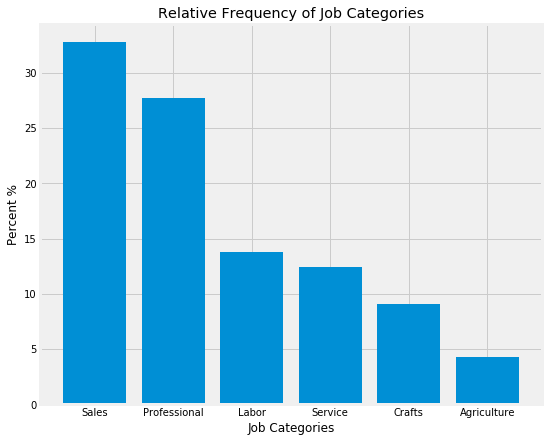

In [13]:
plt.figure(figsize=(8,7))
plt.bar(x=jobs["jobs"], height=jobs["JobCategory"]*100)
plt.title("Relative Frequency of Job Categories")
plt.ylabel("Percent %")
plt.xlabel("Job Categories")
plt.show()

Lets now explore the distribution of loan defaults.

In [14]:
loans = data["LoanDefault"].value_counts(normalize=True)
loans.index = ['No-Default', 'Yes-Default']
loans

No-Default     0.7658
Yes-Default    0.2342
Name: LoanDefault, dtype: float64

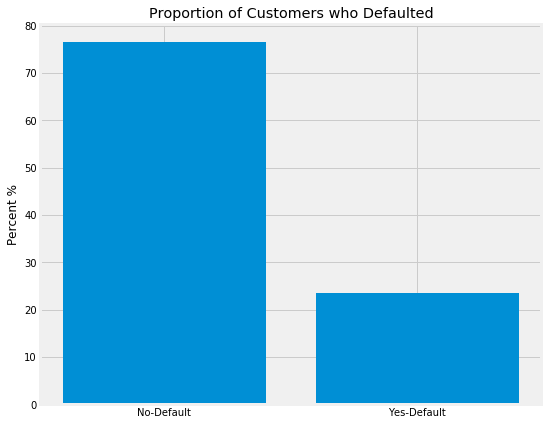

In [138]:
plt.figure(figsize=(8,7))
plt.bar(loans.index, loans.values*100)
plt.title("Proportion of Customers who Defaulted")
plt.ylabel("Percent %")
plt.show()

## Note:
Most of the customers did not default on their loans. That means the proportion is skewed to the negative class (no-default). We must take this into consideration when we are doing model evaluation.

Looks like the majority of these customers did not default on their loans. The majority of the customers are in sales or professional industries. A small proportion of them are in agriculture.

Let's now explore the summary statistics of the entire dataframe to see if we can find missing values, outliers, or erroneous values. We need to assess the quality of this dataset, looking to find candidates for removal - we want to start removing extraneous or problematic features.

In [16]:
data.describe(include="all")

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
count,5000,5000.00000,5000,4967,5000.000000,5000.000000,4985,5000,5000.000000,5000,...,5000,5000,5000,5000,5000.000000,5000,5000,5000,5000,5000
unique,5000,NaN,6,2,NaN,NaN,6,2,NaN,2,...,2,2,2,2,NaN,2,2,2,2,2
top,5554-NCBAIT-OK4,NaN,1,Female,NaN,NaN,Sales,No,NaN,No,...,No,No,No,No,NaN,Yes,No,No,No,No
freq,1,NaN,1436,2494,NaN,NaN,1635,4244,NaN,4262,...,2605,2597,2610,3257,NaN,3164,2604,2626,4106,2637
mean,NaN,3.00140,NaN,NaN,47.025600,14.543000,NaN,NaN,9.730400,NaN,...,NaN,NaN,NaN,NaN,19.645000,NaN,NaN,NaN,NaN,NaN
std,NaN,1.42176,NaN,NaN,17.770338,3.281083,NaN,NaN,9.690929,NaN,...,NaN,NaN,NaN,NaN,5.165609,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,NaN,NaN,18.000000,6.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.00000,NaN,NaN,31.000000,12.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.00000,NaN,NaN,47.000000,14.000000,NaN,NaN,7.000000,NaN,...,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.00000,NaN,NaN,62.000000,17.000000,NaN,NaN,15.000000,NaN,...,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN


In [17]:
data.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber'],
      dtype='obje

### Findings:

After exploring the data and getting to know the some of the demographic features, I will removed the following features:

- CustomerID, UnionMember: these feature will not contribute to the analysis or are irrelevant to our business objectives.
- NumberPets, NumberCats, NumberDogs, NumberBirds: these features are irrelevant to our business objectives.
- CarOwnership, CommuteTime, CarBrand: these features have faulty values or are irrelevant to our business objectives.
- PoliticalPartyMember, Votes: this feature is irrelevant to our business objectives.
- CreditCard: this feature has faulty values.
- ActiveLifestyle, NewsSuscriber: these features are irrelevant to our business objectives.

The following features will be dropped.


In [18]:
data = data.drop(columns=["CustomerID",
                         "UnionMember",
                         "NumberPets",
                         "NumberCats",
                         "NumberDogs",
                         "NumberBirds",
                         "CarOwnership",
                         "CarBrand",
                         "CommuteTime",
                         "PoliticalPartyMem",
                         "Votes",
                         "CreditCard",
                         "ActiveLifestyle",
                         "NewsSubscriber"])

In [19]:
data.shape

(5000, 45)

We now have 45 features left. We will continue to drop features as we continue exploring the data and find features that are more relevant to the business objective of 1. clustering the data into segments 2. predict whether or not a new customer will default on their loan.


In order to accomplish these tasks we will need to preprocess the data before inputing into the machine learning algorithms. 

## Feature preprocessing procedure:

Before we segment the customers we need to clean up the dataset and do feature selection. We will first preprocess the data for the clustering algorithm and then the classification - both algorithms require numeric inputs, therefore, we will either exclude categorical features or convert them into dummy variables.

1. Clean up numerical features that have unwanted characters like "\$", ",", "(", etc. within the value. I'll remove these using regex matching with the "re" library. To scale this process I'll create a cleaner function. Afterwards, they will be converted to numeric type. 
2. Removing unwanted or missing values. After finding unviable or irrelevant features, we will remove them from the data frame.
3. Encoding categorical features. Some of the qualitative features like "LoanDefault" or "JobCategory" need to be encoded before inputing them into any algorithm. 
4. Dropping rows with missing values. Since a very small proportion of the observations in the dataset are missing (most columns have less than 1\%, we will drop the rows with missing values and still have a decent sample size. 

5. Filtering for only numeric types. While I could encode all of the categorical variables into numbers, I am deciding not to since most of those features seem extraneous to me after exploring the data. For now, I am going to filter for only the numeric types - including encoded features. The remaining dataframe will then be turned into a numpy array since most of the algorithms I will be only accept 2D arrays as inputs.
6. Dimensionality reduction using PCA. I will use PCA to find the principal components of the dataset. After finding the number of components we will transform the features into PCA features that we can input into the KMeans algorithm.


In [20]:
data.columns

Index(['Region', 'TownSize', 'Gender', 'Age', 'EducationYears', 'JobCategory',
       'EmploymentLength', 'Retired', 'HHIncome', 'DebtToIncomeRatio',
       'CreditDebt', 'OtherDebt', 'LoanDefault', 'MaritalStatus',
       'HouseholdSize', 'HomeOwner', 'CarsOwned', 'CarValue', 'CardTenure',
       'CardItemsMonthly', 'CardSpendMonth', 'PhoneCoTenure', 'VoiceLastMonth',
       'VoiceOverTenure', 'EquipmentRental', 'EquipmentLastMonth',
       'EquipmentOverTenure', 'CallingCard', 'WirelessData', 'DataLastMonth',
       'DataOverTenure', 'Multiline', 'VM', 'Pager', 'Internet', 'CallerID',
       'CallWait', 'CallForward', 'ThreeWayCalling', 'EBilling',
       'TVWatchingHours', 'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem',
       'OwnsFax'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
Region                 5000 non-null int64
TownSize               5000 non-null object
Gender                 4967 non-null object
Age                    5000 non-null int64
EducationYears         5000 non-null int64
JobCategory            4985 non-null object
EmploymentLength       5000 non-null int64
Retired                5000 non-null object
HHIncome               5000 non-null object
DebtToIncomeRatio      5000 non-null float64
CreditDebt             5000 non-null float64
OtherDebt              5000 non-null float64
LoanDefault            5000 non-null object
MaritalStatus          5000 non-null object
HouseholdSize          4992 non-null float64
HomeOwner              4987 non-null float64
CarsOwned              5000 non-null int64
CarValue               5000 non-null object
CardTenure             5000 non-null int64
CardItemsMonthly       5000 non-null int64
CardSpendMonth 

Many of the features that are stored as object types are really numeric columns with either faulty values, or strings attatched to them. Lets take a look at some of the object features. 

In [22]:
data[['CarValue',
      'CardSpendMonth',
      'VoiceLastMonth',
      'VoiceOverTenure',
      'EquipmentLastMonth',
      'EquipmentOverTenure',
      'DataLastMonth',
      'DataOverTenure'
]]

,CarValue,CardSpendMonth,VoiceLastMonth,VoiceOverTenure,EquipmentLastMonth,EquipmentOverTenure,DataLastMonth,DataOverTenure
0,"$14,300.00",$816.60,$19.50,$34.40,$29.50,$126.10,$-,$-
1,"$6,800.00",$426.00,$26.70,$330.60,$54.85,"$1,975.00",$45.65,"$1,683.55"
2,"$18,800.00","$1,842.20",$85.20,"$1,858.35",$-,$-,$-,$-
3,"$8,700.00","$3,409.90",$18.00,$199.45,$-,$-,$-,$-
4,"$10,600.00","$2,551.00",$9.15,$74.10,$-,$-,$19.05,$410.80
5,"$(1,000.00)","$2,282.70",$24.30,$264.90,$35.50,$970.95,$-,$-
6,"$25,600.00","$8,223.20",$11.40,$44.80,$-,$-,$-,$-
7,"$55,500.00","$5,927.00",$44.55,$612.70,$-,$-,$-,$-
8,"$8,600.00","$3,265.90",$63.15,"$1,074.35",$-,$-,$-,$-
9,"$41,000.00","$1,996.40",$10.95,$20.05,$-,$-,$-,$-


- CarValue
- CardSpendMonth
- VoiceLastMonth
- VoiceOverTenure
- EquipmentLastMonth
- EquipmentOverTenure
- DataLastMonth
- DataOverTenure


These variables need cleaning.

## Cleaning:

I'll start by creating a cleaner function which will take in a column as input and process the column using regex. Afterwards, I'll convert them to numeric types.

I'll also check for missing values. If some columns have too many missing values I will remove them.

In [23]:
# create cleaning function
import re
def cleaner(col):
    """
    Take in col and substitutes, replaces with "",
    and return new object.
    """
    y = re.sub("[\$,]", "", col)
    return y

In [24]:
# too many missing values
datalastmonth = data["DataLastMonth"].apply(cleaner)
datalastmonth.value_counts().head()

 -         3656
 34.30        9
 22.95        7
 32.20        7
 27.95        7
Name: DataLastMonth, dtype: int64

In [25]:
# too many missing
dataovertenure = data["DataOverTenure"].apply(cleaner)
dataovertenure.value_counts().head()

 -           3656
 14.90          2
 1050.65        2
 183.10         2
 2182.05        2
Name: DataOverTenure, dtype: int64

In [26]:
# good
voicelastmonth = data["VoiceLastMonth"].apply(cleaner)
voicelastmonth.value_counts().head()

 12.60     31
 15.00     29
 23.70     28
 22.50     25
 16.95     25
Name: VoiceLastMonth, dtype: int64

In [27]:
# good
voiceovertenure = data["VoiceOverTenure"].apply(cleaner)
voiceovertenure.value_counts().head()

 2.05      8
 2.60      6
 16.45     5
 14.30     5
 1.40      4
Name: VoiceOverTenure, dtype: int64

In [28]:
# too  many missing
equipmentlast = data["EquipmentLastMonth"].apply(cleaner)
equipmentlast.value_counts().head()

 -         3296
 31.15        8
 36.50        8
 32.30        8
 38.80        8
Name: EquipmentLastMonth, dtype: int64

In [29]:
# too many missing 
equipmenttenure = data["EquipmentOverTenure"].apply(cleaner)
equipmenttenure.value_counts().head()

 -           3296
 747.30         2
 1463.55        2
 163.40         2
 1918.80        2
Name: EquipmentOverTenure, dtype: int64

Thus far only VoiceLastMonth and VoiceOverTenure are viable features to keep. I'll explore some other numeric columns that are object type.

In [30]:
data[["CarValue", "HHIncome", "CardSpendMonth"]]

,CarValue,HHIncome,CardSpendMonth
0,"$14,300.00","$31,000.00",$816.60
1,"$6,800.00","$15,000.00",$426.00
2,"$18,800.00","$35,000.00","$1,842.20"
3,"$8,700.00","$20,000.00","$3,409.90"
4,"$10,600.00","$23,000.00","$2,551.00"
5,"$(1,000.00)","$107,000.00","$2,282.70"
6,"$25,600.00","$77,000.00","$8,223.20"
7,"$55,500.00","$97,000.00","$5,927.00"
8,"$8,600.00","$16,000.00","$3,265.90"
9,"$41,000.00","$84,000.00","$1,996.40"


CardSpendMonth has too many missing values, so I'll remove that as well. CarValue has an additional value to extract "(" and ")". Doesn't look like other values have that within them so I'll address this individually.

In [31]:
carvalue = data["CarValue"].apply(lambda x: re.sub(r"[\$,\(\)]", "", x))
carvalue.value_counts().head()

 1000.00      497
 9800.00       25
 13500.00      24
 6300.00       24
 13000.00      23
Name: CarValue, dtype: int64

In [32]:
hhincome = data["HHIncome"].apply(cleaner)
hhincome.value_counts().head()

 22000.00     112
 29000.00     109
 25000.00     108
 30000.00     102
 20000.00     102
Name: HHIncome, dtype: int64

## Viable features

- VoiceLastMonth
- VoiceOverTenure
- CarValue
- HHIncome

I'll now convert these to numeric types and add them to the dataframe.

In [33]:
data["VoiceLastMonth"] = pd.to_numeric(voicelastmonth, errors='coerce')
data["VoiceOverTenure"] = pd.to_numeric(voiceovertenure, errors='coerce')
data["CarValue"] = pd.to_numeric(carvalue, errors='coerce')
data["HHIncome"] = pd.to_numeric(hhincome, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
Region                 5000 non-null int64
TownSize               5000 non-null object
Gender                 4967 non-null object
Age                    5000 non-null int64
EducationYears         5000 non-null int64
JobCategory            4985 non-null object
EmploymentLength       5000 non-null int64
Retired                5000 non-null object
HHIncome               5000 non-null float64
DebtToIncomeRatio      5000 non-null float64
CreditDebt             5000 non-null float64
OtherDebt              5000 non-null float64
LoanDefault            5000 non-null object
MaritalStatus          5000 non-null object
HouseholdSize          4992 non-null float64
HomeOwner              4987 non-null float64
CarsOwned              5000 non-null int64
CarValue               5000 non-null float64
CardTenure             5000 non-null int64
CardItemsMonthly       5000 non-null int64
CardSpendMont

Removing unviable features: CardSpendMonth, EquipmentLastMonth, EquipmentOverTenure, DataLastMonth, DataOverTenure. These features have too many missing values to work with. So they will dropped.

In [34]:
data = data.drop(columns=["CardSpendMonth", 
                    "EquipmentLastMonth", 
                    "EquipmentOverTenure", 
                    "DataLastMonth",
                    "DataOverTenure"])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
Region               5000 non-null int64
TownSize             5000 non-null object
Gender               4967 non-null object
Age                  5000 non-null int64
EducationYears       5000 non-null int64
JobCategory          4985 non-null object
EmploymentLength     5000 non-null int64
Retired              5000 non-null object
HHIncome             5000 non-null float64
DebtToIncomeRatio    5000 non-null float64
CreditDebt           5000 non-null float64
OtherDebt            5000 non-null float64
LoanDefault          5000 non-null object
MaritalStatus        5000 non-null object
HouseholdSize        4992 non-null float64
HomeOwner            4987 non-null float64
CarsOwned            5000 non-null int64
CarValue             5000 non-null float64
CardTenure           5000 non-null int64
CardItemsMonthly     5000 non-null int64
PhoneCoTenure        5000 non-null int64
VoiceLastMon

## Encoding categorical features:

- Gender: Male 1, Female 0
- JobCategory: dummy variables for each job.
- Retired: Yes 1, No 0.
- LoanDefault: Yes 1, No 0.
- MaritalStatus: Married 1, Unmarried 0.
- HomeOwner: Yes 1, No 0.
- EquipmentRental: Yes 1, No 0.
- CallerID: Yes 1, No 0.
- CallWait: Yes 1, No 0.
- CallForward: Yes 1, No 0.
- ThreeWayCalling: Yes 1, No 0.
- Ebilling: Yes 1, No 0.
- OwnsPC: Yes 1, No 0.
- OwnsMobileDevice: Yes 1, No 0.

## Features we are excluding:

- CallingCard: this feature is no longer valid.
- WirelessData: this feature is irrelevant to our business objectives.
- MultilineData: this feature is irrelevant to our business objectives.
- VM: this feature is irrelevant to our business objectives.
- Pager: this feature is no longer valid.
- OwnsGameSystem: this feature is irrelevant to our business objectives.
- OwnsFax: this feature is irrelevant to our business objectives.
- Internet: this feature has faulty values.


I may not keep all of these features for the model. Later on I will do dimensionality reduction to find the most relevant, but in order to do that they need to be numeric type.

In [36]:

data[["Gender",
      "Retired",
      "LoanDefault",
      "MaritalStatus", 
      "HomeOwner",
      "EquipmentRental",
      "CallerID",
      "CallWait",
      "CallForward",
      "ThreeWayCalling",
      "EBilling",
      "OwnsPC",
     "OwnsMobileDevice"]] = data[["Gender","Retired","LoanDefault","MaritalStatus","HomeOwner","EquipmentRental","CallerID","CallWait","CallForward", "ThreeWayCalling","EBilling","OwnsPC","OwnsMobileDevice"]].replace({"Yes": 1,
     "No": 0,
     "Married": 1,
     "Unmarried": 0,
     "Male": 1,
     "Female": 0})

In [37]:
# verifying
data[["Gender",
      "Retired",
      "LoanDefault",
      "MaritalStatus", 
      "HomeOwner",
      "EquipmentRental",
      "CallerID",
      "CallWait",
      "CallForward",
      "ThreeWayCalling",
      "EBilling",
      "OwnsPC",
     "OwnsMobileDevice"]].head()

,Gender,Retired,LoanDefault,MaritalStatus,HomeOwner,EquipmentRental,CallerID,CallWait,CallForward,ThreeWayCalling,EBilling,OwnsPC,OwnsMobileDevice
0,0.0,0,1,0,0.0,1,0,1,1,1,0,0,1
1,1.0,0,1,0,1.0,1,1,0,1,0,1,1,1
2,0.0,0,0,1,1.0,0,0,0,0,0,0,0,0
3,1.0,0,1,1,1.0,0,0,0,0,0,1,1,1
4,1.0,0,0,1,0.0,0,1,1,1,1,0,1,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
Region               5000 non-null int64
TownSize             5000 non-null object
Gender               4967 non-null float64
Age                  5000 non-null int64
EducationYears       5000 non-null int64
JobCategory          4985 non-null object
EmploymentLength     5000 non-null int64
Retired              5000 non-null int64
HHIncome             5000 non-null float64
DebtToIncomeRatio    5000 non-null float64
CreditDebt           5000 non-null float64
OtherDebt            5000 non-null float64
LoanDefault          5000 non-null int64
MaritalStatus        5000 non-null int64
HouseholdSize        4992 non-null float64
HomeOwner            4987 non-null float64
CarsOwned            5000 non-null int64
CarValue             5000 non-null float64
CardTenure           5000 non-null int64
CardItemsMonthly     5000 non-null int64
PhoneCoTenure        5000 non-null int64
VoiceLastMonth

In [39]:
data.select_dtypes(include='object').head()

,TownSize,JobCategory,CallingCard,WirelessData,Multiline,VM,Pager,Internet,OwnsGameSystem,OwnsFax
0,2,Professional,Yes,No,Yes,Yes,Yes,No,Yes,No
1,5,Sales,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes
2,4,Sales,Yes,No,Yes,No,No,No,No,No
3,3,Sales,Yes,No,Yes,No,No,2,Yes,No
4,2,Sales,Yes,Yes,No,Yes,No,3,Yes,No


Lets drop the categorical features we are excluding.

In [40]:
data = data.drop(columns=["CallingCard", 
"WirelessData",
"Multiline",
"VM",
"Pager",
"OwnsGameSystem",
"OwnsFax",
"Internet"])

In [41]:
data.shape

(5000, 32)

Townsize needs to be converted to numeric type.

In [42]:
data["TownSize"] = pd.to_numeric(data["TownSize"], errors='coerce')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
Region               5000 non-null int64
TownSize             4998 non-null float64
Gender               4967 non-null float64
Age                  5000 non-null int64
EducationYears       5000 non-null int64
JobCategory          4985 non-null object
EmploymentLength     5000 non-null int64
Retired              5000 non-null int64
HHIncome             5000 non-null float64
DebtToIncomeRatio    5000 non-null float64
CreditDebt           5000 non-null float64
OtherDebt            5000 non-null float64
LoanDefault          5000 non-null int64
MaritalStatus        5000 non-null int64
HouseholdSize        4992 non-null float64
HomeOwner            4987 non-null float64
CarsOwned            5000 non-null int64
CarValue             5000 non-null float64
CardTenure           5000 non-null int64
CardItemsMonthly     5000 non-null int64
PhoneCoTenure        5000 non-null int64
VoiceLastMont

Last step for the encoding is changing JobCategory into dummy variables using one-hot-encoding.

In [44]:
data = pd.concat([data, pd.get_dummies(data["JobCategory"])], axis=1)

In [45]:
data = data.drop(columns=["JobCategory"])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
Region               5000 non-null int64
TownSize             4998 non-null float64
Gender               4967 non-null float64
Age                  5000 non-null int64
EducationYears       5000 non-null int64
EmploymentLength     5000 non-null int64
Retired              5000 non-null int64
HHIncome             5000 non-null float64
DebtToIncomeRatio    5000 non-null float64
CreditDebt           5000 non-null float64
OtherDebt            5000 non-null float64
LoanDefault          5000 non-null int64
MaritalStatus        5000 non-null int64
HouseholdSize        4992 non-null float64
HomeOwner            4987 non-null float64
CarsOwned            5000 non-null int64
CarValue             5000 non-null float64
CardTenure           5000 non-null int64
CardItemsMonthly     5000 non-null int64
PhoneCoTenure        5000 non-null int64
VoiceLastMonth       5000 non-null float64
VoiceOverTen

In [47]:
data[["Agriculture",
      "Crafts",
      "Labor",
      "Professional",
      "Sales", 
      "Service"]] = data[["Agriculture",
                          "Crafts",
                          "Labor",
                          "Professional",
                          "Sales",
                          "Service"]].astype('int64')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
Region               5000 non-null int64
TownSize             4998 non-null float64
Gender               4967 non-null float64
Age                  5000 non-null int64
EducationYears       5000 non-null int64
EmploymentLength     5000 non-null int64
Retired              5000 non-null int64
HHIncome             5000 non-null float64
DebtToIncomeRatio    5000 non-null float64
CreditDebt           5000 non-null float64
OtherDebt            5000 non-null float64
LoanDefault          5000 non-null int64
MaritalStatus        5000 non-null int64
HouseholdSize        4992 non-null float64
HomeOwner            4987 non-null float64
CarsOwned            5000 non-null int64
CarValue             5000 non-null float64
CardTenure           5000 non-null int64
CardItemsMonthly     5000 non-null int64
PhoneCoTenure        5000 non-null int64
VoiceLastMonth       5000 non-null float64
VoiceOverTen

## Removing missing values:

Since we have a small amount of missing values I will drop the rows with missing values using the dropna() function.

In [49]:
data.isnull().sum()

Region                0
TownSize              2
Gender               33
Age                   0
EducationYears        0
EmploymentLength      0
Retired               0
HHIncome              0
DebtToIncomeRatio     0
CreditDebt            0
OtherDebt             0
LoanDefault           0
MaritalStatus         0
HouseholdSize         8
HomeOwner            13
CarsOwned             0
CarValue              0
CardTenure            0
CardItemsMonthly      0
PhoneCoTenure         0
VoiceLastMonth        0
VoiceOverTenure       3
EquipmentRental       0
CallerID              0
CallWait              0
CallForward           0
ThreeWayCalling       0
EBilling              0
TVWatchingHours       0
OwnsPC                0
OwnsMobileDevice      0
Agriculture           0
Crafts                0
Labor                 0
Professional          0
Sales                 0
Service               0
dtype: int64

In [50]:
# dropping missing values 
df = data.dropna()

In [51]:
df.isnull().sum()

Region               0
TownSize             0
Gender               0
Age                  0
EducationYears       0
EmploymentLength     0
Retired              0
HHIncome             0
DebtToIncomeRatio    0
CreditDebt           0
OtherDebt            0
LoanDefault          0
MaritalStatus        0
HouseholdSize        0
HomeOwner            0
CarsOwned            0
CarValue             0
CardTenure           0
CardItemsMonthly     0
PhoneCoTenure        0
VoiceLastMonth       0
VoiceOverTenure      0
EquipmentRental      0
CallerID             0
CallWait             0
CallForward          0
ThreeWayCalling      0
EBilling             0
TVWatchingHours      0
OwnsPC               0
OwnsMobileDevice     0
Agriculture          0
Crafts               0
Labor                0
Professional         0
Sales                0
Service              0
dtype: int64

In [52]:
df.shape

(4942, 37)

In [53]:
df.head()

,Region,TownSize,Gender,Age,EducationYears,EmploymentLength,Retired,HHIncome,DebtToIncomeRatio,CreditDebt,...,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,Agriculture,Crafts,Labor,Professional,Sales,Service
0,1,2.0,0.0,20,15,0,0,31000.0,11.1,1.200909,...,0,13,0,1,0,0,0,1,0,0
1,5,5.0,1.0,22,17,0,0,15000.0,18.6,1.222020,...,1,18,1,1,0,0,0,0,1,0
2,3,4.0,0.0,67,14,16,0,35000.0,9.9,0.928620,...,0,21,0,0,0,0,0,0,1,0
3,4,3.0,1.0,23,16,0,0,20000.0,5.7,0.022800,...,1,26,1,1,0,0,0,0,1,0
4,2,2.0,1.0,26,16,1,0,23000.0,1.7,0.214659,...,0,27,1,0,0,0,0,0,1,0


Now that we have a clean to some quick summary stats on some of the features.

In [54]:
df.describe()

,Region,TownSize,Gender,Age,EducationYears,EmploymentLength,Retired,HHIncome,DebtToIncomeRatio,CreditDebt,...,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,Agriculture,Crafts,Labor,Professional,Sales,Service
count,4942.000000,4942.00000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4.942000e+03,4942.000000,4942.000000,...,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000
mean,2.998988,2.68272,0.497977,47.074464,14.549980,9.753136,0.147916,5.489336e+04,9.927195,1.861405,...,0.349656,19.638810,0.634966,0.479968,0.042695,0.090449,0.137394,0.276204,0.326184,0.124039
std,1.422134,1.42409,0.500046,17.760594,3.280491,9.699167,0.355052,5.557551e+04,6.381175,3.426866,...,0.476910,5.166217,0.481489,0.499649,0.202190,0.286853,0.344297,0.447164,0.468863,0.329659
min,1.000000,1.00000,0.000000,18.000000,6.000000,0.000000,0.000000,9.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.00000,0.000000,32.000000,12.000000,2.000000,0.000000,2.400000e+04,5.100000,0.386456,...,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.00000,0.000000,47.000000,14.000000,7.000000,0.000000,3.800000e+04,8.700000,0.926798,...,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.00000,1.000000,62.000000,17.000000,15.000000,0.000000,6.700000e+04,13.500000,2.067956,...,1.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5.000000,5.00000,1.000000,79.000000,23.000000,52.000000,1.000000,1.073000e+06,43.100000,109.072596,...,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.columns

Index(['Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'EmploymentLength', 'Retired', 'HHIncome', 'DebtToIncomeRatio',
       'CreditDebt', 'OtherDebt', 'LoanDefault', 'MaritalStatus',
       'HouseholdSize', 'HomeOwner', 'CarsOwned', 'CarValue', 'CardTenure',
       'CardItemsMonthly', 'PhoneCoTenure', 'VoiceLastMonth',
       'VoiceOverTenure', 'EquipmentRental', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'Agriculture', 'Crafts', 'Labor',
       'Professional', 'Sales', 'Service'],
      dtype='object')

## Findings:


For the first task we need to find clusters within the customers that have statistically significant differences in the following demographic and financial metrics:

- Region, Age, MaritalStatus, HHIncome, DebtToIncomeRatio, CreditDebt, OtherDebt, LoanDefault, HomeOwner, CarsOwned, CarValue, CardTenure. 

Before we find segments we want to explore some of the distributions of the desired metrics.

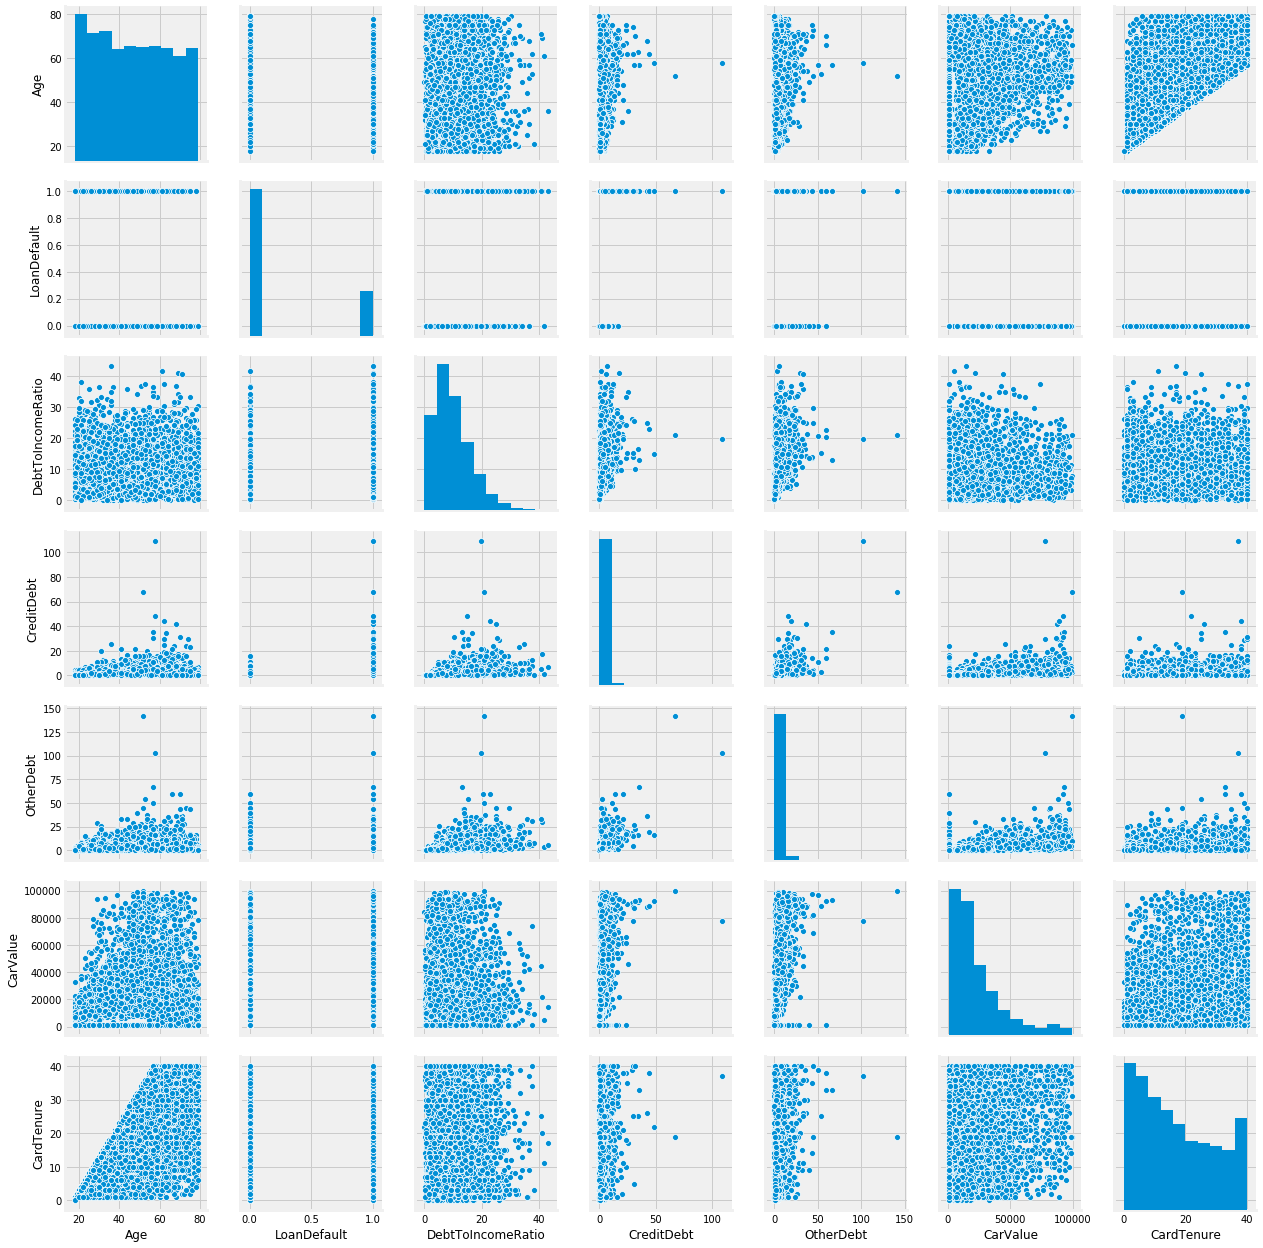

In [154]:
sns.pairplot(df[["Age",
                 "LoanDefault", 
                 "DebtToIncomeRatio",
                 "CreditDebt", 
                 "OtherDebt",  
                 "CarValue", 
                 "CardTenure"]])
plt.show()


## Correlations

In [57]:
# absolute value of the correlations in descending order
clean_corr = df.corr().abs().sort_values(by='LoanDefault',ascending=False)
# filtering for only correlations above 0.3
final_corr = clean_corr[clean_corr > 0.3]["LoanDefault"].dropna()
final_corr

LoanDefault         1.000000
Age                 0.392253
CardTenure          0.332132
EmploymentLength    0.325415
Name: LoanDefault, dtype: float64

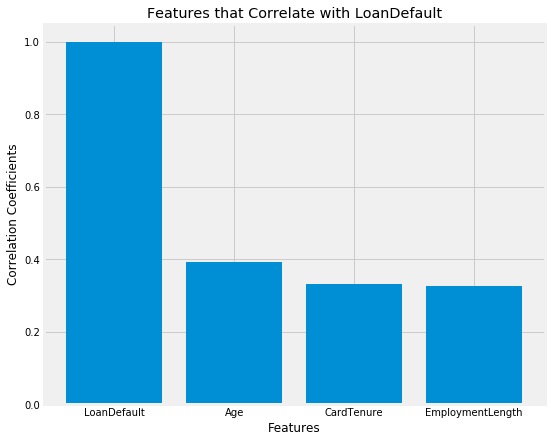

In [58]:
plt.figure(figsize=(8,7))
plt.bar(x=final_corr.index, height=final_corr.values)
plt.title("Features that Correlate with LoanDefault")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficients")
plt.show()

## Findings:

LoanDefault correlates with Age, CardTenure, and EmploymentLength. These are definitely features to include in predicting defaults.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4942 entries, 0 to 4999
Data columns (total 37 columns):
Region               4942 non-null int64
TownSize             4942 non-null float64
Gender               4942 non-null float64
Age                  4942 non-null int64
EducationYears       4942 non-null int64
EmploymentLength     4942 non-null int64
Retired              4942 non-null int64
HHIncome             4942 non-null float64
DebtToIncomeRatio    4942 non-null float64
CreditDebt           4942 non-null float64
OtherDebt            4942 non-null float64
LoanDefault          4942 non-null int64
MaritalStatus        4942 non-null int64
HouseholdSize        4942 non-null float64
HomeOwner            4942 non-null float64
CarsOwned            4942 non-null int64
CarValue             4942 non-null float64
CardTenure           4942 non-null int64
CardItemsMonthly     4942 non-null int64
PhoneCoTenure        4942 non-null int64
VoiceLastMonth       4942 non-null float64
VoiceOverTen

In [60]:
## Feature engineering

## Dimensionality reduction:

In order to find the most relevant features in this dataset I will perform dimensionality reduction using Principal Component Analysis (PCA). Before we use the PCA class we need to scale the features. To make the workflow smoother I will create a pipeline with the scaler and the PCA class. 

Using PCA will help us find the datasets its intrinsic dimension and remove the "noise". PCA discards low variance PCA features by assuming that the high variance features are informative. Finding its intrinsic dimension can help me decide how many n_components to select for the PCA tranformation of my features. 

In [61]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to df
pipeline.fit(df)

# Plot the explained variances
features = range(pca.n_components_)

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


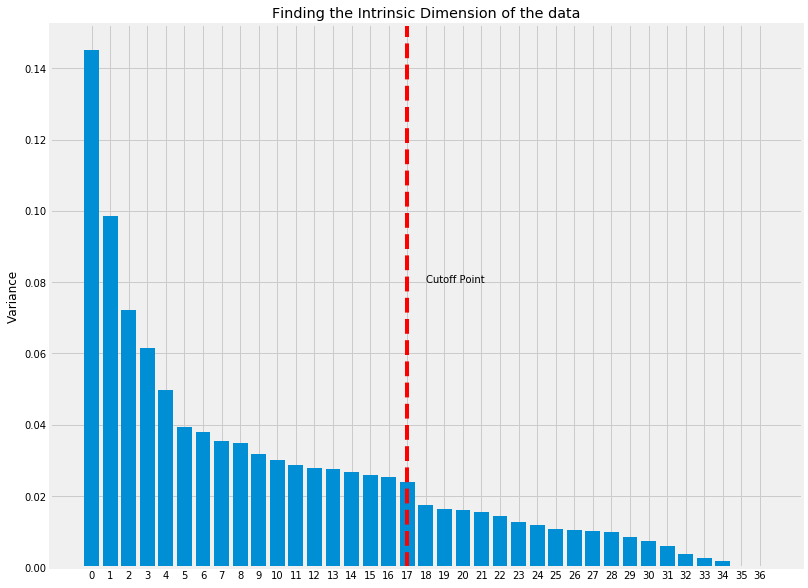

In [62]:
plt.figure(figsize=(12,10))
plt.bar(features, pca.explained_variance_ratio_)
plt.title("Finding the Intrinsic Dimension of the data")
plt.axvline(x=17, c='r', linestyle='--')
plt.text(18,0.08,'Cutoff Point')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

In [63]:
list(pca.explained_variance_ratio_)

[0.14527226320094722,
 0.09863384102195086,
 0.07226106801539187,
 0.06163726948923976,
 0.04967608841707325,
 0.039498609472961195,
 0.038064502125686094,
 0.03554085953825192,
 0.0347953854746913,
 0.031778131111284955,
 0.03024829970185946,
 0.028760830186651674,
 0.027934456367236234,
 0.02763066870160302,
 0.026708329154963576,
 0.025974847172911385,
 0.025391388382684742,
 0.0239319709297105,
 0.017614472420565446,
 0.016437928298824747,
 0.016083977783327978,
 0.01543303941873093,
 0.014293078756676545,
 0.012578365287637047,
 0.011943495421626815,
 0.010875622985431073,
 0.01057822000033203,
 0.010238494156435537,
 0.009862407855536062,
 0.008448755185216634,
 0.007519639308198249,
 0.005945526635483219,
 0.0036097109787168527,
 0.002498101099546005,
 0.001875529610281021,
 0.0003193152298308107,
 0.00010551110250387263]

## Findings:


The graph plots the explained variance of the features. Its difficult to decide what the actual intrinsic dimension is using the PCA assumptions. Since there are exceptions to those assumptions, I will choose a variance cutoff of 14 components since the plot shows it changing rapidly after 14.

We will iterate through these different values later. But we will first explore using a n_components=4 to transform our features into pca features.

In [64]:
# Create a PCA model with 17 components: pca
pca2 = PCA(n_components=17)

# Create pipeline: pipeline
pipeline2 = make_pipeline(scaler, pca2)

# Fit the PCA instance to the scaled samples
pipeline2.fit(df)

# Transform the scaled samples: pca_features
pca_features = pipeline2.transform(df)

# Print the shape of pca_features
pca_features.shape

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


(4942, 17)

In [65]:
pca_features

array([[-3.03298932,  0.71303269, -1.02652524, ...,  0.0542937 ,
         0.31687335,  0.95288582],
       [-2.95870039,  0.89747225,  1.13090651, ...,  1.1518872 ,
         0.76957461,  1.68218695],
       [ 2.29308757, -2.31737158,  0.56515701, ..., -0.64878381,
         0.06401817,  0.40088485],
       ...,
       [ 4.27016818,  1.7450254 , -1.47922677, ...,  1.17762986,
        -0.8009286 ,  0.54092228],
       [-0.32524233,  3.43018973,  3.86945554, ...,  1.08032179,
         0.83208973, -0.50028657],
       [ 0.58732566, -1.35948224, -0.02761037, ..., -0.80722507,
         0.28512224,  0.17181362]])

## Clustering procedure:


1. Training the models and finding the right number of clusters. I'll use the K-Means algorithm to cluster our customers and vary the hyperparameters of the model to find the right number of n_clusters.
2. Finding the labels. After finding the optimal hyperparemter we can train our final model and predict the labels of the features.
3. Model evaluation

In [66]:
# train model with varying clusters
# using 1-20 clusters
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters: model
inerts = []
for n in range(1,21):
    model = KMeans(n_clusters=n, init='k-means++', random_state=42, n_init=50)
    # Fit model to points
    model.fit(pca_features)
    # find inertia
    x = model.inertia_
    inerts.append(x)

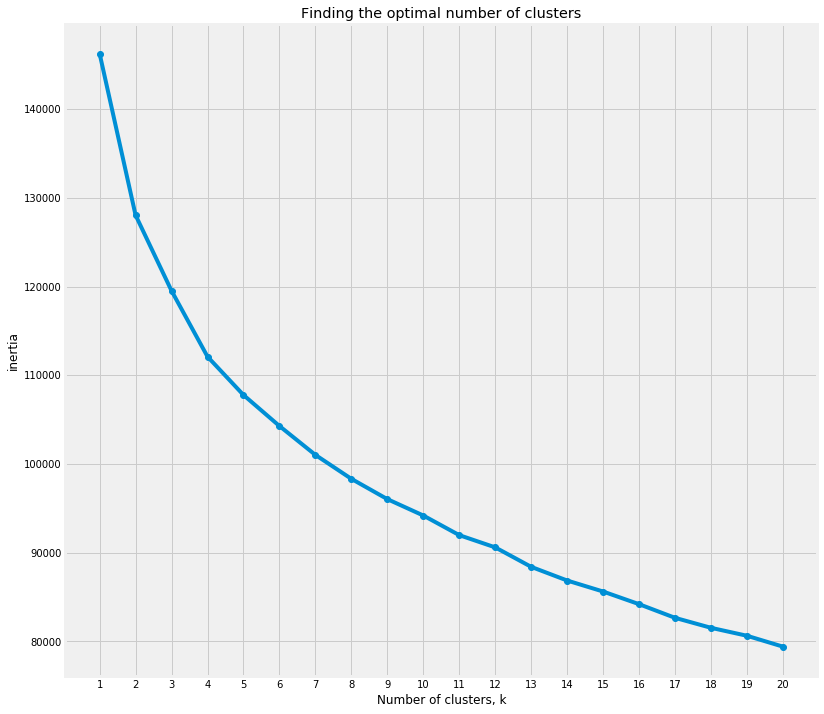

In [67]:
# Plot ks vs inertias
ks = range(1,21)
plt.figure(figsize=(12,12))
plt.plot(ks, inerts, '-o')
plt.title("Finding the optimal number of clusters")
plt.xlabel('Number of clusters, k')
plt.ylabel('inertia')
plt.xticks(np.arange(1,21))

plt.show()

Its difficult to choose the optimal number of clusters. It appears to start slowing down around 4 clusters.

In [68]:
# using 4 clusters for KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_features)
labels = kmeans.predict(pca_features)

labels

array([2, 0, 3, ..., 1, 1, 0], dtype=int32)

Now that we have predicted labels for the segments we can visual some of their features. Since we are looking to discover segments with statistically significant differences in their financial and demographic metrics, we can visual their averages across their segments to evaluate the K-Means clustering method. 

In [69]:
df.columns

Index(['Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'EmploymentLength', 'Retired', 'HHIncome', 'DebtToIncomeRatio',
       'CreditDebt', 'OtherDebt', 'LoanDefault', 'MaritalStatus',
       'HouseholdSize', 'HomeOwner', 'CarsOwned', 'CarValue', 'CardTenure',
       'CardItemsMonthly', 'PhoneCoTenure', 'VoiceLastMonth',
       'VoiceOverTenure', 'EquipmentRental', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'Agriculture', 'Crafts', 'Labor',
       'Professional', 'Sales', 'Service'],
      dtype='object')

In [70]:
df["labels_1"] = labels
two_group_df = df.groupby("labels_1").mean()
two_group_df.loc[:,["Region",
                    "Age",
                    "HHIncome",
                    "MaritalStatus",
                    "LoanDefault",
                    "DebtToIncomeRatio",
                    "CreditDebt",
                    "OtherDebt",
                    "HomeOwner",
                    "CarsOwned",
                    "CarValue",
                    "CardTenure"]]


/Users/davidaponte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Region,Age,HHIncome,MaritalStatus,LoanDefault,DebtToIncomeRatio,CreditDebt,OtherDebt,HomeOwner,CarsOwned,CarValue,CardTenure
labels_1,,,,,,,,,,,,
0,2.960959,37.945343,39575.013943,0.435583,0.330731,9.951924,1.301420,2.562284,0.596765,2.153374,17730.619074,9.710541
1,3.039916,57.176471,168525.210084,0.487395,0.283613,13.308403,7.174959,13.486129,0.819328,2.468487,67672.268908,26.781513
2,3.062698,40.568714,47754.274858,0.498417,0.259658,9.141292,1.367375,2.801170,0.647245,2.083597,21076.124129,11.724509
3,2.951554,67.031079,40861.974406,0.521024,0.013711,9.549817,1.180303,2.380586,0.575868,2.000000,17143.692870,30.933272


In [140]:
most_imp_features = two_group_df[["CreditDebt",
             "EmploymentLength",
             "DebtToIncomeRatio",
             "Age",
             "OtherDebt", "LoanDefault"]]
most_imp_features["segments"] = most_imp_features.index
most_imp_features

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CreditDebt,EmploymentLength,DebtToIncomeRatio,Age,OtherDebt,LoanDefault,segments
labels_1,,,,,,,
0,1.301420,4.540993,9.951924,37.945343,2.562284,0.330731,0
1,7.174959,18.909664,13.308403,57.176471,13.486129,0.283613,1
2,1.367375,5.823306,9.141292,40.568714,2.801170,0.259658,2
3,1.180303,19.983547,9.549817,67.031079,2.380586,0.013711,3


#### Note:

For these visuals, I decided to use a library that allowed me to apply the grammar of graphics and costruct a plot of my liking - Plotnine.

#### Reference:

https://plotnine.readthedocs.io/en/stable/index.html

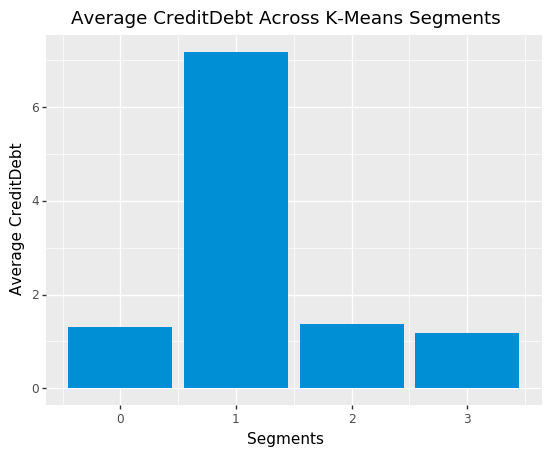

<ggplot: (7004275043)>

In [72]:
from plotnine import *

ggplot(most_imp_features, aes(x='segments', y='CreditDebt')) + geom_col(fill="#008FD5") + labs(title="Average CreditDebt Across K-Means Segments", 
                                                                                x="Segments", 
                                                                                y="Average CreditDebt")

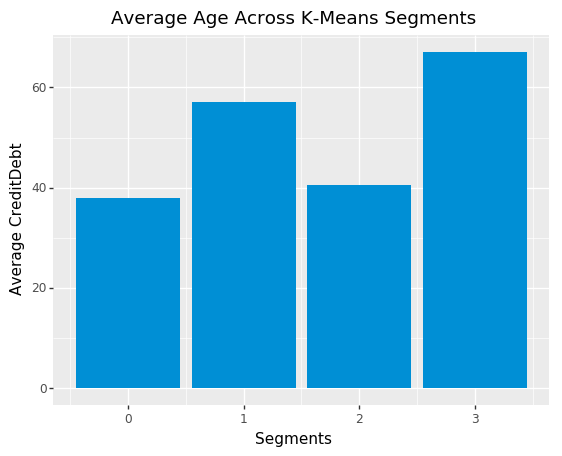

<ggplot: (7016049377)>

In [73]:
ggplot(most_imp_features, aes(x='segments', y='Age')) + geom_col(fill="#008FD5") + labs(title="Average Age Across K-Means Segments", 
                                                                                x="Segments", 
                                                                                y="Average CreditDebt")

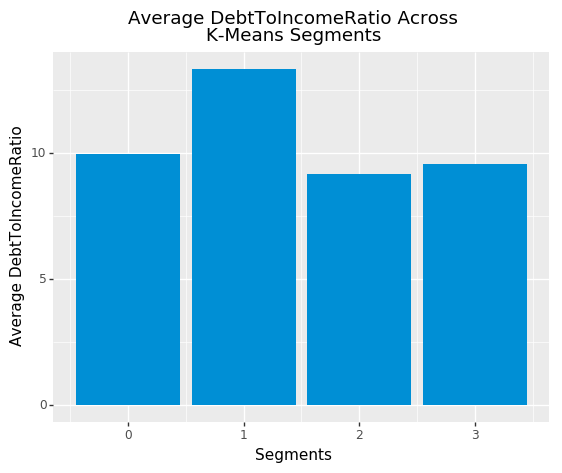

<ggplot: (7015482807)>

In [74]:
ggplot(most_imp_features, aes(x='segments', y='DebtToIncomeRatio')) + geom_col(fill="#008FD5") + labs(title="Average DebtToIncomeRatio Across\nK-Means Segments", 
                                                                                x="Segments", 
                                                                                y="Average DebtToIncomeRatio")

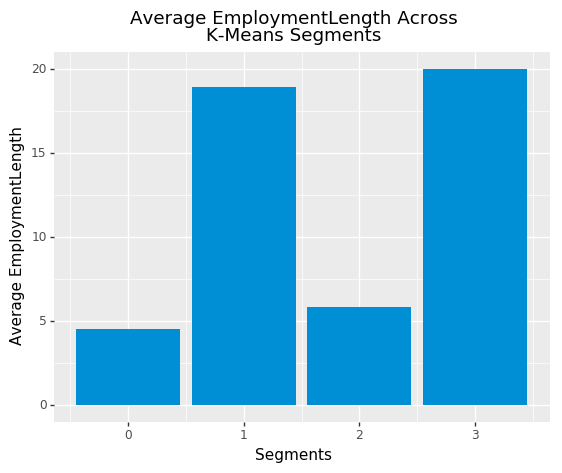

<ggplot: (-9223372029830465045)>

In [75]:
ggplot(most_imp_features, aes(x='segments', y='EmploymentLength')) + geom_col(fill="#008FD5") + labs(title="Average EmploymentLength Across\nK-Means Segments", 
                                                                                x="Segments", 
                                                                                y="Average EmploymentLength")

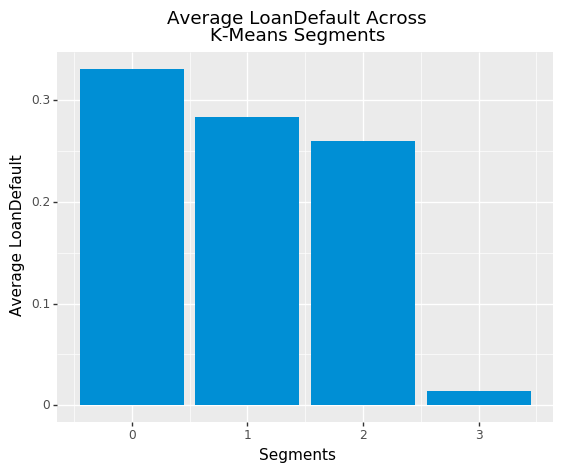

<ggplot: (7024326797)>

In [141]:
ggplot(most_imp_features, aes(x='segments', y='LoanDefault')) + geom_col(fill="#008FD5") + labs(title="Average LoanDefault Across\nK-Means Segments", 
                                                                                x="Segments", 
                                                                                y="Average LoanDefault")

In [76]:
segment_0 = df[df["labels_1"] == 0][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue",
    "CardTenure"]]
segment_1 = df[df["labels_1"] == 1][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue",
    "CardTenure"]]
segment_2 = df[df["labels_1"] == 2][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue",
    "CardTenure"]]
segment_3 = df[df["labels_1"] == 3][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue",
    "CardTenure"]]

## Testing the viability of the segments

To make sure there is a statistically significant difference between these segments, I will conduct hypothesis tests.

1. For this test the null hypothesis is that there is no difference between the groups.
2. The alternative hypothesis is that there is a difference between the two groups.

We will use ANOVA to see if the groups are different. The level of significance for this test is alpha=0.05

In [77]:
from scipy.stats import ttest_ind, f_oneway

f_scores, pvalues = f_oneway(segment_0, segment_1, segment_2, segment_3)

In [142]:

anova = pd.DataFrame({"f_scores": f_scores,
              "p_values": pvalues})

median_pvalue, median_fscore = anova["p_values"].median(), anova["f_scores"].median()
print(median_pvalue, median_fscore)

1.8715424090403976e-31 86.94709178383886


In [79]:
anova.index = segment_0.columns.tolist()
anova

,f_scores,p_values
Region,2.022046,1.085837e-01
Age,1343.861548,0.000000e+00
EmploymentLength,1577.940088,0.000000e+00
MaritalStatus,7.964095,2.701472e-05
DebtToIncomeRatio,55.600025,2.435546e-35
CreditDebt,568.431081,2.326497e-317
OtherDebt,904.381982,0.000000e+00
HomeOwner,33.101667,3.553307e-21
CarsOwned,15.259109,6.996664e-10
CarValue,1490.226200,0.000000e+00


We reject the null hypothesis and accept the alternative that there is a statistically significant difference between these four segments.

## Predicting loan defaults:

For this task we will use all of the features as the input matrix and LoanDefault as the target feature.


## Classification procedure:

1. We will first set up our feature matrix and target vector. As of now all features will be included.
2. To try out some models we will use train test splits to assess the models ability to generalize - this will help reduce overfitting. Later on we will use cross-validation. 
3. Various algorithms will be used. The optimal algorithm will be used to segment the data based on their probabilities. We will use various metrics to assess model quality - e.g. accuracy, auc, recall.
4. After finding the best algorithm we will try to find the best model with randomized grid search - fine tuning the hypyerparameters.
5. Using the optimal model we will divide the probabilities into low, medium, high, and very high segments. 
6. We will assess the quality of our segments using ANOVA.




In [80]:
# predictors
X = df.drop(columns=["LoanDefault", "labels_1"])
# target
y = df.loc[:, "LoanDefault"]

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## XGBoost Classifier

In [82]:
import xgboost as xgb

xg_cl = xgb.XGBClassifier(objective="binary:logistic", n_estimators=10, max_depth=4, seed=123)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
print("Accuracy ", accuracy_score(y_test, preds))

Accuracy  0.8190091001011123


In [83]:
precision_score(y_test, preds)

0.6761363636363636

Out of all the customers that shouldn't have defaulted on their loans, 68% were correctly predicted by the model - which is better than chance but its still a weak model.

In [84]:
recall_score(y_test, preds)

0.49377593360995853

Out of all the customers that should have defaulted on their loans, less than 50% of them were correctly predicted by the model - which isn't much better than chance.

In [85]:
f1_score(y_test, preds)

0.5707434052757794

In [86]:
confusion_matrix(y_test, preds)

array([[691,  57],
       [122, 119]])

In [87]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       748
           1       0.68      0.49      0.57       241

   micro avg       0.82      0.82      0.82       989
   macro avg       0.76      0.71      0.73       989
weighted avg       0.81      0.82      0.81       989



The model has decent accuracy - 82%. But it has poor precision - when the model predicts whether a customer will default it is only correct 68% of the time; and it only predicted 50% of the customers who defaulted. This model has poor peformance. Lets now undergo model selection.

<Figure size 1080x864 with 0 Axes>

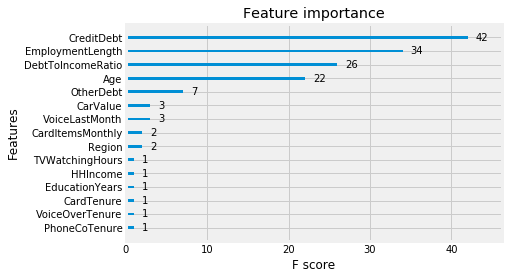

In [94]:
plt.figure(figsize=(15,12))
xgb.plot_importance(xg_cl)
plt.show()

The following features were the most important in predicting whether or not a customer will default on their loan:

- CreditDebt
- EmploymentLength
- DebtToIncomeRatio
- Age


Features to be dropped:

- TVWatchingHours
- HHIncome
- EducationYears
- CardTenure
- VoiceOverTenure
- PhoneCoTenure

Creating a copy of the feature matrix where we drop some of the features just in case we need to use the original matrix later.

In [95]:
X2 = X.copy()
X2 = X2.drop(columns = ['TVWatchingHours',
                        'HHIncome',
                        'EducationYears',
                        'CardTenure',
                        'VoiceOverTenure',
                        'PhoneCoTenure']) # to exclude segments


In [96]:
X2.shape

(4942, 30)

In [155]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=xg_cl,
                        X=X2,
                        y=y,
                        cv=4,
                         scoring='roc_auc',
                        n_jobs=1)
print("average score: ", np.mean(scores))
print("variance: ", np.std(scores))

average score:  0.8698366841148999
variance:  0.01295554002564248


## Findings:

XGBClassifier performed decent. Its best AUC score was about 87, with a variance of 0.013, and its best accuracy was 83, but it had low recall and precision. Lets now try Logistic Regression.

## Logistic Regression

Lets now see how logistic regression performs. We will also standardize the features as different scales can affect the logistic regression algorithms performance.

In [101]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

pipeline_log = make_pipeline(scaler, log_reg)
pipeline_log.fit(X_train, y_train)
log_preds = pipeline_log.predict(X_test)
print("Accuracy score ", accuracy_score(y_test, log_preds))

Accuracy score  0.8240647118301314


/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [102]:
precision_score(y_test, log_preds)

0.6914285714285714

In [103]:
recall_score(y_test, log_preds)

0.5020746887966805

In [104]:
confusion_matrix(y_test, log_preds)

array([[694,  54],
       [120, 121]])

In [105]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       748
           1       0.69      0.50      0.58       241

   micro avg       0.82      0.82      0.82       989
   macro avg       0.77      0.71      0.74       989
weighted avg       0.81      0.82      0.81       989



Now lets train and cross validate. Ill take the average score and standard deviation to how well the model generalizes.

In [106]:

scores = cross_val_score(estimator=pipeline_log,
                        X=X2,
                        y=y,
                        cv=4,
                         scoring='roc_auc',
                        n_jobs=1)
print("average score: ", np.mean(scores))
print("variance: ", np.std(scores))

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:

average score:  0.882111695286481
variance:  0.010576685125719255


/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


I'll now use a KNN Classifier to see how it performs. This will help me find the optimal model to create the segments.

## KNeighborsClassifier

In [107]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier.predict(X_test)

# Making the Confusion Matrix
confusion_matrix(y_test, y_pred_knn)

array([[672,  76],
       [197,  44]])

In [108]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       748
           1       0.37      0.18      0.24       241

   micro avg       0.72      0.72      0.72       989
   macro avg       0.57      0.54      0.54       989
weighted avg       0.67      0.72      0.69       989



In [109]:
scores = cross_val_score(estimator=classifier,
                        X=X2,
                        y=y,
                        cv=4,
                         scoring='roc_auc',
                        n_jobs=1)
print("average score: ", np.mean(scores))
print("variance: ", np.std(scores))

average score:  0.6250081565104866
variance:  0.013139352788863263


Now a SVM Classifier to see how it also performs.

## SVC

In [110]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)

pipeline_svc = make_pipeline(scaler, svc)
pipeline_svc.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svc = pipeline_svc.predict(X_test)

# Making the Confusion Matrix

confusion_matrix(y_test, y_pred_svc)

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[701,  47],
       [133, 108]])

In [111]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       748
           1       0.70      0.45      0.55       241

   micro avg       0.82      0.82      0.82       989
   macro avg       0.77      0.69      0.72       989
weighted avg       0.81      0.82      0.80       989



In [112]:
scores = cross_val_score(estimator=pipeline_svc,
                        X=X2,
                        y=y,
                        cv=4,
                         scoring='roc_auc',
                        n_jobs=1)
print("average score: ", np.mean(scores))
print("variance: ", np.std(scores))

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:4

average score:  0.8786318712496426
variance:  0.009152176167183359


/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## Findings:

XGBClassifier and Logistic Regression worked best. We will use randomized grid search to find the optimal model for both XGBoost and Logistic Regression to then create segments. We will evaluate the quality of the segments using ANOVA.

## XGBClassifier hyperparameter tuning using RandomsizedSearchCV

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV


# customer_pipeline
customer_pipeline = Pipeline([
    ("ss", StandardScaler()),
    ("clf", xgb.XGBClassifier())
])


# Create the parameter grid
# regularizing to reduce variance 
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05), 
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=customer_pipeline,
                                        param_distributions=gbm_param_grid,
                                        n_iter=10, 
                                        scoring='roc_auc', 
                                        cv=4, 
                                        verbose=1,
                                       random_state=0)

# Fit the estimator
randomized_roc_auc.fit(X2, y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: Dat

0.8667694952719386
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15000000000000002,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1))])


## Optimal hyperparameters:

- eta = 0.15
- max_depth = 9
- n_estimators = 50

## XGBClassifier segmentation:

I order to better understand the predicted probabilities, I will transform the probabilites into discrete values: low probability, med probability, high probability, very high probability. 

In [114]:
best_xgb_cl = randomized_roc_auc.best_estimator_
best_xgb_cl.fit(X2, y)
xgb_probs = best_xgb_cl.predict_proba(X2)

xgb_probs

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[0.23248553, 0.76751447],
       [0.13865244, 0.86134756],
       [0.99726844, 0.00273157],
       ...,
       [0.9958423 , 0.00415773],
       [0.17938173, 0.8206183 ],
       [0.9531311 , 0.04686891]], dtype=float32)

In [115]:
X_final = X2.copy()
X_final["no_default_prob"], X_final["default_prob"] = xgb_probs[:, 0], xgb_probs[:, 1]

In [116]:
X_final.head()

,Region,TownSize,Gender,Age,EmploymentLength,Retired,DebtToIncomeRatio,CreditDebt,OtherDebt,MaritalStatus,...,OwnsPC,OwnsMobileDevice,Agriculture,Crafts,Labor,Professional,Sales,Service,no_default_prob,default_prob
0,1,2.0,0.0,20,0,0,11.1,1.200909,2.240091,0,...,0,1,0,0,0,1,0,0,0.232486,0.767514
1,5,5.0,1.0,22,0,0,18.6,1.222020,1.567980,0,...,1,1,0,0,0,0,1,0,0.138652,0.861348
2,3,4.0,0.0,67,16,0,9.9,0.928620,2.536380,1,...,0,0,0,0,0,0,1,0,0.997268,0.002732
3,4,3.0,1.0,23,0,0,5.7,0.022800,1.117200,1,...,1,1,0,0,0,0,1,0,0.469653,0.530347
4,2,2.0,1.0,26,1,0,1.7,0.214659,0.176341,1,...,1,0,0,0,0,0,1,0,0.935967,0.064033


In [117]:

def prob_segmentation(col):
    """
    This function turns the float values
    into categorical values.
    """
    if col > 0.75:
        return "very_high"
    elif col <= 0.75 and col > 0.50:
        return "high"
    elif col <= 0.50 and col > 0.25:
        return "medium"
    elif col < 0.25:
        return "low"

In [118]:
xgb_prob_segments = X_final["default_prob"].apply(prob_segmentation)
xgb_prob_segments.value_counts()

low          3521
very_high     688
high          431
medium        302
Name: default_prob, dtype: int64

In [119]:
X_final["prob_segments"] = xgb_prob_segments
xgb_probability_segments = X_final.groupby("prob_segments").mean()
xgb_probability_segments.loc[:, ["Region",
                    "Age",
                    "EmploymentLength",
                    "MaritalStatus",
                    "DebtToIncomeRatio",
                    "CreditDebt",
                    "OtherDebt",
                    "HomeOwner",
                    "CarsOwned",
                    "CarValue"]]

,Region,Age,EmploymentLength,MaritalStatus,DebtToIncomeRatio,CreditDebt,OtherDebt,HomeOwner,CarsOwned,CarValue
prob_segments,,,,,,,,,,
high,2.979118,32.935035,2.819026,0.505800,9.212297,1.052371,2.340033,0.610209,2.071926,16543.155452
low,3.005396,52.828174,12.292531,0.492758,8.732888,1.465068,3.371087,0.640443,2.107924,24361.800625
medium,2.983444,28.013245,1.605960,0.483444,10.196689,1.093420,2.236474,0.605960,2.162252,14785.430464
very_high,2.985465,34.853198,4.677326,0.393895,16.368895,4.733682,6.522404,0.597384,2.247093,27128.197674


Like I did with the logistic regression model, we will now visualize some of the most statistically significant features:

- CreditDebt
- Age
- DebtToIncomeRatio
- EmploymentLength
- OtherDebt

We wont evaluate LoanDefault across the segments since the segments are based on their probabilities of defaulting already.

In [120]:
xgb_most_imp_features = xgb_probability_segments[["CreditDebt",
             "EmploymentLength",
             "DebtToIncomeRatio",
             "Age",
             "OtherDebt"]]
xgb_most_imp_features["segments"] = xgb_most_imp_features.index
xgb_most_imp_features

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CreditDebt,EmploymentLength,DebtToIncomeRatio,Age,OtherDebt,segments
prob_segments,,,,,,
high,1.052371,2.819026,9.212297,32.935035,2.340033,high
low,1.465068,12.292531,8.732888,52.828174,3.371087,low
medium,1.093420,1.605960,10.196689,28.013245,2.236474,medium
very_high,4.733682,4.677326,16.368895,34.853198,6.522404,very_high


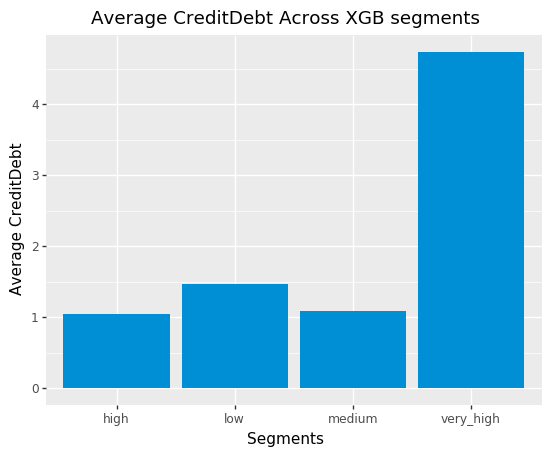

<ggplot: (7016572883)>

In [121]:
ggplot(xgb_most_imp_features, aes(x='segments', y='CreditDebt')) + geom_col(fill='#008FD5') + labs(title="Average CreditDebt Across XGB segments", 
                                                                                x="Segments", 
                                                                                y="Average CreditDebt")

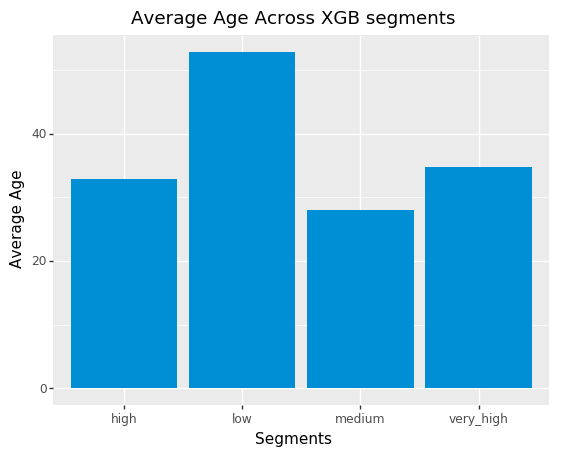

<ggplot: (7004178387)>

In [122]:
ggplot(xgb_most_imp_features, aes(x='segments', y='Age')) + geom_col(fill='#008FD5') + labs(title="Average Age Across XGB segments", 
                                                                                x="Segments", 
                                                                                y="Average Age")

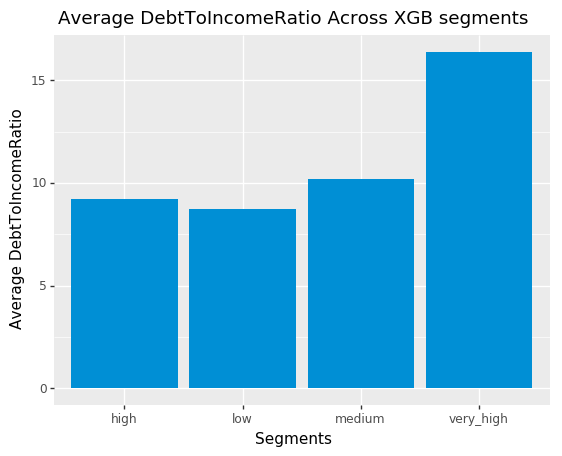

<ggplot: (-9223372029837793031)>

In [123]:
ggplot(xgb_most_imp_features, aes(x='segments', y='DebtToIncomeRatio')) + geom_col(fill='#008FD5') + labs(title="Average DebtToIncomeRatio Across XGB segments", 
                                                                                x="Segments", 
                                                                                y="Average DebtToIncomeRatio")

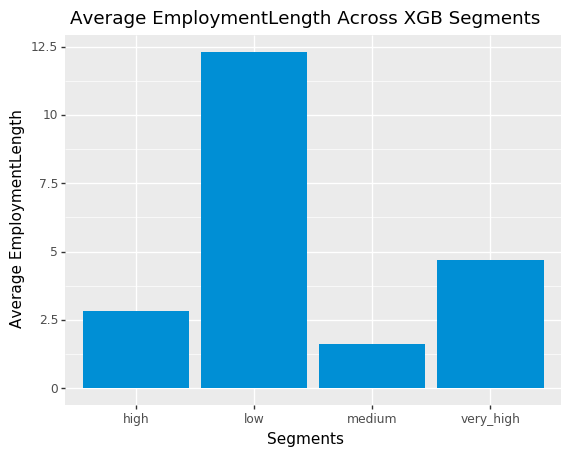

<ggplot: (-9223372029839301821)>

In [124]:
ggplot(xgb_most_imp_features, aes(x='segments', y='EmploymentLength')) + geom_col(fill='#008FD5') + labs(title="Average EmploymentLength Across XGB Segments", 
                                                                                x="Segments", 
                                                                                y="Average EmploymentLength")

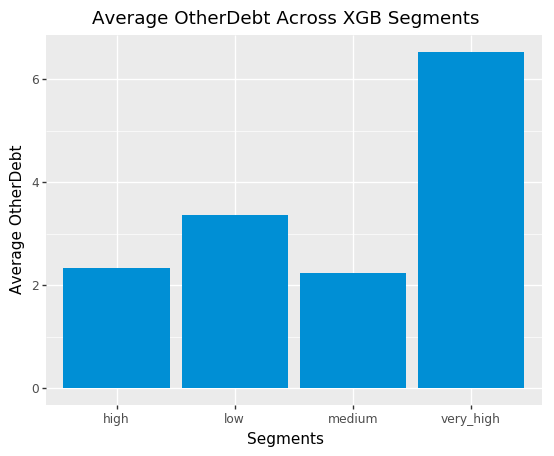

<ggplot: (7024304104)>

In [145]:
ggplot(xgb_most_imp_features, aes(x='segments', y='OtherDebt')) + geom_col(fill="#008FD5") + labs(title="Average OtherDebt Across XGB Segments", 
                                                                                x="Segments", 
                                                                                y="Average OtherDebt")

In [125]:
high_xgb = X_final[X_final["prob_segments"] == "high"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]
very_high_xgb =  X_final[X_final["prob_segments"] == "very_high"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]
medium_xgb = X_final[X_final["prob_segments"] == "medium"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]
low_xgb = X_final[X_final["prob_segments"] == "low"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]

In [147]:
f_scores, pvalues = f_oneway(high_xgb, very_high_xgb, medium_xgb, low_xgb)
anova_xgb = pd.DataFrame({"f_scores": f_scores,
              "p_values": pvalues})
median_xgb_pvalue, median_xgb_fscore = anova_xgb["p_values"].median(), anova_xgb["f_scores"].median()
anova_xgb.index = high_xgb.columns.tolist()
median_xgb_pvalue, median_xgb_fscore

(1.5183179955655493e-27, 65.25483105320279)

In [148]:
anova_xgb

,f_scores,p_values
Region,0.084593,9.684698e-01
Age,597.746915,0.000000e+00
EmploymentLength,348.405080,3.135953e-205
MaritalStatus,7.996817,2.577547e-05
DebtToIncomeRatio,332.515225,1.162076e-196
CreditDebt,214.485352,8.676985e-131
OtherDebt,87.794905,2.412860e-55
HomeOwner,2.086393,9.980486e-02
CarsOwned,2.521665,5.603738e-02
CarValue,42.714757,3.036636e-27


## Findings:

The segments are viable. Lets now compare to the logistic regression segmentation. The same procedure will take place:

- Hyperparameter tuning using Randomized Grid Search.
- Select best estimator (model).
- Predict probabilities and segment.

## Logistic Regression hyperparameter tuning using RandomsizedSearchCV

In [127]:
log_pipeline = Pipeline([
    ("ss", StandardScaler()),
    ("model", LogisticRegression(penalty='l2'))
     ])

log_param_grid = {
    'model__C': np.power(10.0, np.arange(-10, 10))
}

# Perform RandomizedSearchCV
log_roc_auc = RandomizedSearchCV(estimator=log_pipeline,
                                        param_distributions=log_param_grid,
                                        n_iter=10, 
                                        scoring='roc_auc', 
                                        cv=4, 
                                        verbose=1,
                                       random_state=0)

# Fit the estimator
log_roc_auc.fit(X2, y)

# Compute metrics
print(log_roc_auc.best_score_)
print(log_roc_auc.best_estimator_)



Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users

0.8821127589656159
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])


## Optimal hyperparameters:

- C = 1.0

In [128]:
best_log = log_roc_auc.best_estimator_
best_log

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

## Logistic Regression segmentation

In [129]:
# predicting probabilities
pred_prob_log = best_log.predict_proba(X2)

# creating second final dataframe
X_final2 = X2.copy()
# adding probabilities to dataframe
X_final2["no_default_prob"], X_final2["default_prob"] = pred_prob_log[:, 0], pred_prob_log[:,1]

# converting probabilities to segments
log_prob_segments = X_final2["default_prob"].apply(prob_segmentation)
# viewing distribution
log_prob_segments.value_counts()

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


low          3133
medium        936
high          561
very_high     312
Name: default_prob, dtype: int64

In [130]:
log_prob_segments

0       very_high
1       very_high
2             low
3          medium
4          medium
5             low
6             low
7          medium
8             low
9             low
10            low
11            low
12            low
13            low
14            low
15            low
16            low
17            low
18            low
19            low
20            low
21            low
22            low
23           high
24           high
25            low
26           high
27           high
28            low
29         medium
          ...    
4970          low
4971          low
4972       medium
4973         high
4974          low
4975       medium
4976          low
4977          low
4978       medium
4979          low
4980         high
4981          low
4982          low
4983          low
4984       medium
4985          low
4986         high
4987          low
4988          low
4989          low
4990         high
4991          low
4992          low
4993          low
4994      

In [131]:
# looking for differences among segments
X_final2["prob_segments"] = log_prob_segments
probability_segments_log = X_final2.groupby("prob_segments").mean()
probability_segments_log.loc[:, ["Region",
                    "Age",
                    "EmploymentLength",
                    "MaritalStatus",
                    "DebtToIncomeRatio",
                    "CreditDebt",
                    "OtherDebt",
                    "HomeOwner",
                    "CarsOwned",
                    "CarValue"]]

,Region,Age,EmploymentLength,MaritalStatus,DebtToIncomeRatio,CreditDebt,OtherDebt,HomeOwner,CarsOwned,CarValue
prob_segments,,,,,,,,,,
high,2.989305,29.666667,2.483066,0.409982,13.439216,2.193012,3.720600,0.552585,2.242424,19034.402852
low,3.022024,55.692627,13.502713,0.504628,8.342930,1.357185,3.275003,0.644749,2.104692,24799.329716
medium,2.927350,32.567308,3.081197,0.474359,9.522756,1.454726,3.038966,0.630342,2.080128,18714.209402
very_high,3.000000,35.355769,5.189103,0.368590,20.734295,7.548393,9.130347,0.615385,2.291667,32520.192308


In [132]:
log_most_imp_features = probability_segments_log[["CreditDebt",
             "EmploymentLength",
             "DebtToIncomeRatio",
             "Age",
             "OtherDebt"]]
log_most_imp_features["segments"] = log_most_imp_features.index
log_most_imp_features

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CreditDebt,EmploymentLength,DebtToIncomeRatio,Age,OtherDebt,segments
prob_segments,,,,,,
high,2.193012,2.483066,13.439216,29.666667,3.720600,high
low,1.357185,13.502713,8.342930,55.692627,3.275003,low
medium,1.454726,3.081197,9.522756,32.567308,3.038966,medium
very_high,7.548393,5.189103,20.734295,35.355769,9.130347,very_high


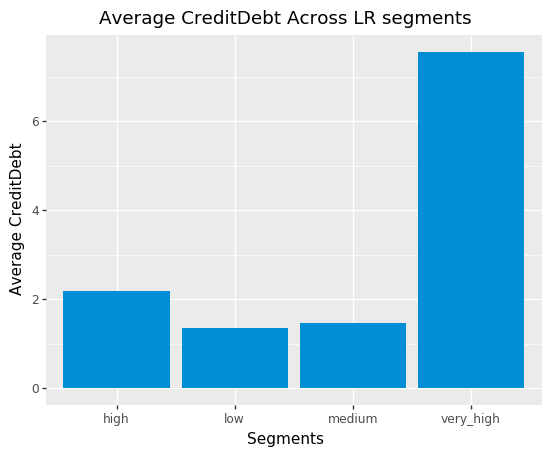

<ggplot: (-9223372029838673320)>

In [133]:
ggplot(log_most_imp_features, aes(x='segments', y='CreditDebt')) + geom_col(fill='#008FD5') + labs(title="Average CreditDebt Across LR segments", 
                                                                                x="Segments", 
                                                                                y="Average CreditDebt")

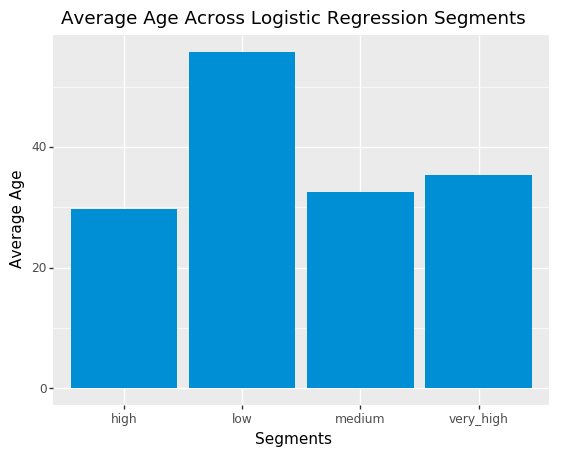

<ggplot: (-9223372029839349525)>

In [134]:
ggplot(log_most_imp_features, aes(x='segments', y='Age')) + geom_col(fill='#008FD5') + labs(title="Average Age Across Logistic Regression Segments", 
                                                                                x="Segments", 
                                                                                y="Average Age")

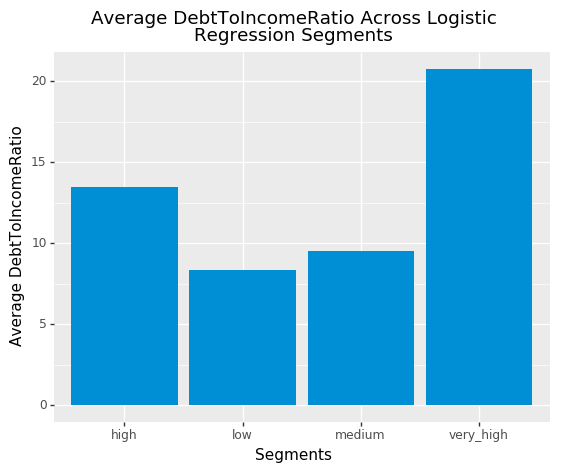

<ggplot: (7004667098)>

In [149]:
ggplot(log_most_imp_features, aes(x='segments', y='DebtToIncomeRatio')) + geom_col(fill='#008FD5') + labs(title="Average DebtToIncomeRatio Across Logistic\nRegression Segments", 
                                                                                x="Segments", 
                                                                                y="Average DebtToIncomeRatio")

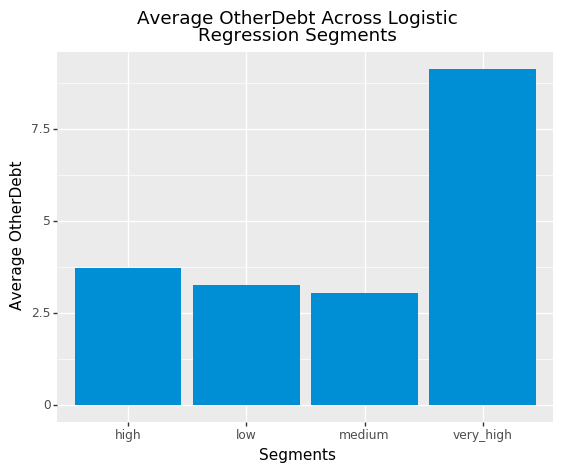

<ggplot: (7015604151)>

In [150]:
ggplot(log_most_imp_features, aes(x='segments', y='OtherDebt')) + geom_col(fill='#008FD5') + labs(title="Average OtherDebt Across Logistic\nRegression Segments", 
                                                                                x="Segments", 
                                                                                y="Average OtherDebt")

In [136]:
high_log = X_final2[X_final2["prob_segments"] == "high"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]
very_high_log =  X_final2[X_final2["prob_segments"] == "very_high"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]
medium_log = X_final2[X_final2["prob_segments"] == "medium"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]
low_log = X_final2[X_final2["prob_segments"] == "low"][[
    "Region",
    "Age",
    "EmploymentLength",
    "MaritalStatus",
    "DebtToIncomeRatio",
    "CreditDebt",
    "OtherDebt",
    "HomeOwner",
    "CarsOwned",
    "CarValue"]]

In [152]:
f_scores, pvalues = f_oneway(high_log, very_high_log, medium_log, low_log)
anova_log = pd.DataFrame({"f_scores": f_scores,
              "p_values": pvalues})
median_log_pvalue, median_log_fscore = anova_log["p_values"].median(), anova_log["f_scores"].median()
anova_log.index = high_log.columns.tolist()
median_log_pvalue, median_log_fscore

(1.8715424090403976e-31, 86.94709178383886)

In [153]:
anova_log

,f_scores,p_values
Region,1.074469,3.585498e-01
Age,1154.528721,0.000000e+00
EmploymentLength,584.881063,0.000000e+00
MaritalStatus,11.492306,1.662612e-07
DebtToIncomeRatio,564.444192,1.985366e-315
CreditDebt,389.523442,4.305488e-227
OtherDebt,124.966997,5.103102e-78
HomeOwner,5.891707,5.204906e-04
CarsOwned,3.828659,9.421287e-03
CarValue,48.927186,3.743085e-31


## Findings:

Let us now compare the segments created by both the logistic regression model and the XGBoost model. 


#### XGB model performance:

- 86.68% AUC
- 82.62% Accuracy
- 67.61% Precision (True positives)
- 49.38% Recall (True negatives)

#### XGB segmentation results:

- The median p-value was 1.5e-27
- The median f-score was 65

#### Logistic Regression model performance:

- 88.21% AUC
- 82.41% Accuracy
- 69.14% Precision (True positives)
- 50.21% Recall (True negatives)

#### Logistic Regression segmentation results:

- The median p-value was 1.9e-31
- The median f-score was 87



#### Summary:

Both models had decent accuracy in predicting loan defaults but overall didnt have great classification results (considering precision and recall). This could be due to poor feature selection, noise in the dataset, or the fact that the labels (LoanDefault) were skewed toward no-defaults. The logistic regression model had the best AUC score and a slightly higher recall score than did the XGB model - it was slightly better at correctly labeling someone as not having defaulted on their loan than the XGB model did. The median p-value was also lower for the logistic regression model (also giving it a higher f-score) which confirms that the average value of the features differ statistically across the features. Because the segments are statistically different (below our decided 0.05 threshold) we will use the logistic regression as our final classification model.

Now that we have chosen our classification model, we need to compare its results to the first segmenation method: K-Means clustering.

## K-Means vs. Logistic Regression segmentation comparison:

In order to decide between the two methods (K-Means and Logistic Regression), we will use the results of their ANOVA test. I decided to use an ANOVA test since they compare the means of many feature, which is what I needed to find the statistical significance of the differences. Since an ANOVA provides us with the p-value and f-score of each feature, I decided to take the median of all the p-values, and the f-scores, to compare the K-Means and Logistic Regression segmentation. Here are our results:

- The K-Means segments had a median p-value of 2.3e-317 and a median f-score of 87. 
- The Logistic Regression had a median p-value of 1.9e-31 an a median f-score of 87.

Since both the p-values are below the threshold of 0.0.5, and have significant f-scores, its hard to decided based on just their ANOVA results. In order to beside between the two I will also take into consideration the interpretabilty of the results - by that I mean, the ability fo understand how the segments were created in the first place. Taking that into consideration, the K-Means model is harder to interpret since the segments were "discovered" within the dataset using the K-Means algorithm; on the other hand the logistic model is easier to explain since its segments were created based on the predicted probabilities of them defaulting. Using their probability of defaulting as a means of segmenation is more in line with our business objective - finding difference in their demographic and financial metrics. In order to better decide, we would need to evaluate the profiles of each of the segments, to see if they provide practical import for finding high and low value customers within the dataset. 